In [2]:
import pandas as pd  #데이터 파일 관련 보뮬
from sklearn.neighbors import KNeighborsClassifier  #기계 학습 관련 모듈
from matplotlib import pyplot as plt
# from sklearnex import patch_sklearn
# patch_sklearn()
import seaborn as sns

In [3]:
file="../data/hair_loss.csv"

In [4]:
hairlossDF=pd.read_csv(file)

In [5]:
hairlossDF

,total_protein,total_keratine,hair_texture,vitamin,manganese,iron,calcium,body_water_content,stress_level,liver_data,hair_fall
0,312,100,14,249,87,55,333,44,41,368,4
1,52,207,3,425,387,1,182,26,65,41,1
2,170,197,11,140,199,91,414,30,54,90,4
3,256,334,19,358,120,3,35,48,45,65,2
4,309,185,58,207,329,301,345,23,90,346,4
...,...,...,...,...,...,...,...,...,...,...,...
99995,440,20,63,209,473,260,12,86,7,281,5
99996,311,233,37,352,194,159,391,57,76,30,5
99997,27,210,10,185,376,278,96,40,49,110,3
99998,450,18,35,250,287,157,81,31,2,156,1


In [6]:
hairlossDF=hairlossDF.astype({'hair_fall':'category'})

In [7]:
hairlossDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   total_protein       100000 non-null  int64   
 1   total_keratine      100000 non-null  int64   
 2   hair_texture        100000 non-null  int64   
 3   vitamin             100000 non-null  int64   
 4   manganese           100000 non-null  int64   
 5   iron                100000 non-null  int64   
 6   calcium             100000 non-null  int64   
 7   body_water_content  100000 non-null  int64   
 8   stress_level        100000 non-null  int64   
 9   liver_data          100000 non-null  int64   
 10  hair_fall           100000 non-null  category
dtypes: category(1), int64(10)
memory usage: 7.7 MB


In [37]:
hairlossDF.isnull().sum()

total_protein         0
total_keratine        0
hair_texture          0
vitamin               0
manganese             0
iron                  0
calcium               0
body_water_content    0
stress_level          0
liver_data            0
hair_fall             0
dtype: int64

In [8]:
corhair=hairlossDF.corr()

In [9]:
hairlossDF.corr()

,total_protein,total_keratine,hair_texture,vitamin,manganese,iron,calcium,body_water_content,stress_level,liver_data,hair_fall
total_protein,1.000000,0.003125,0.001476,0.002986,0.004049,-0.001733,0.001075,0.001715,-0.004181,-0.000333,0.001335
total_keratine,0.003125,1.000000,-0.004992,-0.009062,0.003274,-0.007433,-0.003344,0.000361,-0.006286,-0.001403,-0.003384
hair_texture,0.001476,-0.004992,1.000000,0.003983,0.003974,0.006231,0.004535,-0.000281,-0.002273,-0.001279,0.000468
vitamin,0.002986,-0.009062,0.003983,1.000000,0.000153,-0.002434,-0.000687,0.003608,-0.002619,-0.001782,-0.002807
manganese,0.004049,0.003274,0.003974,0.000153,1.000000,-0.000187,-0.002805,0.001352,0.005764,0.001370,-0.001927
iron,-0.001733,-0.007433,0.006231,-0.002434,-0.000187,1.000000,-0.002237,0.001166,0.004517,0.002613,-0.001475
calcium,0.001075,-0.003344,0.004535,-0.000687,-0.002805,-0.002237,1.000000,-0.001189,0.001974,-0.001003,-0.000300
body_water_content,0.001715,0.000361,-0.000281,0.003608,0.001352,0.001166,-0.001189,1.000000,-0.003345,-0.001276,-0.005824
stress_level,-0.004181,-0.006286,-0.002273,-0.002619,0.005764,0.004517,0.001974,-0.003345,1.000000,0.000195,0.003969
liver_data,-0.000333,-0.001403,-0.001279,-0.001782,0.001370,0.002613,-0.001003,-0.001276,0.000195,1.000000,-0.003030


<Axes: >

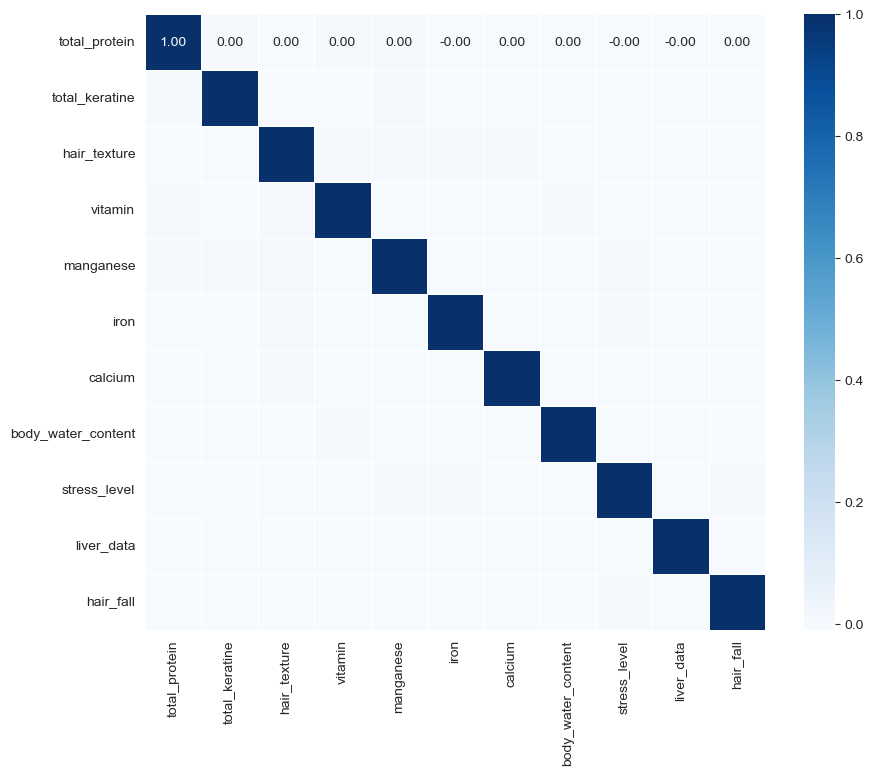

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(data =corhair, annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [11]:
hairlossDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   total_protein       100000 non-null  int64   
 1   total_keratine      100000 non-null  int64   
 2   hair_texture        100000 non-null  int64   
 3   vitamin             100000 non-null  int64   
 4   manganese           100000 non-null  int64   
 5   iron                100000 non-null  int64   
 6   calcium             100000 non-null  int64   
 7   body_water_content  100000 non-null  int64   
 8   stress_level        100000 non-null  int64   
 9   liver_data          100000 non-null  int64   
 10  hair_fall           100000 non-null  category
dtypes: category(1), int64(10)
memory usage: 7.7 MB


In [12]:
hairlossDF.value_counts()

total_protein  total_keratine  hair_texture  vitamin  manganese  iron  calcium  body_water_content  stress_level  liver_data  hair_fall
0              1               67            70       426        31    493      95                  96            214         2            1
333            16              96            64       193        282   50       92                  23            362         1            1
               63              50            419      450        124   126      29                  67            311         1            1
               60              61            175      101        413   47       56                  35            232         5            1
               59              43            478      283        357   194      76                  79            70          3            1
                                                                                                                                          ..
167            144

In [13]:

hairlossDF.duplicated().sum()

0

In [14]:
hairlossDF.columns

Index(['total_protein', 'total_keratine', 'hair_texture', 'vitamin',
       'manganese', 'iron', 'calcium', 'body_water_content', 'stress_level',
       'liver_data', 'hair_fall'],
      dtype='object')

In [15]:
# (3) 기계학습 데이터셋 준비 => 피쳐와 타겟 분리

In [16]:
featureDF=hairlossDF[hairlossDF.columns[:-1]]
targetDF=hairlossDF[hairlossDF.columns[-1]]



In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetDF, test_size=0.2,random_state=23)

In [18]:
#스케일링 

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(X_train)

X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

lm  decedce[모델 학습] 

# [앙상블 모델]

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
en_model=RandomForestClassifier(random_state=55)
en_model.fit(X_train,y_train)

RandomForestClassifier(random_state=55)

In [22]:
en_predictions=en_model.predict(X_test)

In [23]:
en_score=en_model.score(X_test,y_test)

In [24]:
en_score

0.16165

In [25]:
train_score=en_model.score(X_train,y_train)
test_score=en_model.score(X_test,y_test)

print(f'[Train Score: {train_score:}, Test Score: {test_score:}]')

[Train Score: 1.0, Test Score: 0.16165]


[5] 문제 해결 및 성능 향상 즉, 튜닝 <hr>
- 원인 예상
    * 데이터 셋 부족
    * DT의 여러가지 하이퍼파라미터 기본값으로만 사용=> 다양한 값 조절
- 해결 방법
    * 2개의 원인을 한꺼번에 해결하기 위해서 GridSearchCV를 사용


In [26]:
# 모듈 로딩
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [27]:
# 모델 조합 조건
# CV => 기본 5,..
# DT의 하이퍼파라미터 => max_depth,gini.....
from sklearn.tree import DecisionTreeClassifier
dt_model =DecisionTreeClassifier()
n_cv =7
params={'criterion':['gini','entropy','log_loss'],
        'max_depth':[5,10,15],
        'min_samples_split':[2,4,6]
        }
# 하이퍼파라미터 조합된 모델 생성 후 교차검증 데이터셋으로 학습
#시켜주는 인스턴스

In [28]:
gs=GridSearchCV(dt_model,param_grid=params,cv=n_cv)

In [29]:
result=gs.fit(X_train,y_train)

In [30]:
result

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 4, 6]})

In [31]:
# 학습 후 저장된 모델 파라미터 확인 
#교차 학습의 결과 알려주는 코드
gs.cv_results_
#보기 불편해서 데이터 프레임에 담기
cv_resultsDF=pd.DataFrame(gs.cv_results_)

In [32]:
cv_resultsDF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.520504,0.019701,0.011150,0.007052,gini,5,2,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.167731,0.166331,0.164406,0.169219,0.159345,0.165121,0.165733,0.165412,0.002896,25
1,0.508557,0.013868,0.013411,0.005476,gini,5,4,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.167731,0.166331,0.164406,0.169219,0.159345,0.165121,0.165733,0.165412,0.002896,25
2,0.513394,0.024921,0.006674,0.007706,gini,5,6,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.167731,0.166331,0.164406,0.169219,0.159345,0.165121,0.165733,0.165412,0.002896,25
3,1.112040,0.090196,0.006708,0.007746,gini,10,2,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.162656,0.167206,0.171231,0.172019,0.166608,0.165558,0.166083,0.167337,0.003030,9
4,1.120042,0.087500,0.009140,0.007928,gini,10,4,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.162656,0.167381,0.171319,0.172281,0.167133,0.165908,0.165646,0.167475,0.003094,7
5,1.119916,0.050763,0.006719,0.007758,gini,10,6,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.162744,0.167381,0.171231,0.172194,0.166783,0.165558,0.165646,0.167362,0.003075,8
6,1.982406,0.186776,0.010458,0.006841,gini,15,2,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.167994,0.170181,0.164406,0.164844,0.165208,0.165383,0.163808,0.165975,0.002109,16
7,2.014657,0.197503,0.015535,0.000215,gini,15,4,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.166681,0.169569,0.163531,0.163531,0.166258,0.166258,0.162671,0.165500,0.002231,24
8,1.973858,0.182577,0.013606,0.005561,gini,15,6,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.167644,0.169919,0.163706,0.164406,0.165908,0.165908,0.162058,0.165650,0.002407,17
9,0.535824,0.022341,0.004468,0.007065,entropy,5,2,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.168256,0.167031,0.164231,0.169831,0.158558,0.165996,0.165558,0.165637,0.003351,20


In [33]:
# 조합된 모델 중 최고의 성능을 내는 하이퍼파라미터
gs.best_params_

{'criterion': 'log_loss', 'max_depth': 15, 'min_samples_split': 2}

In [34]:
#조합된 모델 중 최고의 점수
gs.best_score_  #테스트 스코어가 기준, 만약 트레인 스코어가 보고 싶으면, return_train_score 부분을 False로 해준다.

0.16806237000099195

In [35]:
en_model.predict(X_train)

array([4, 4, 4, ..., 2, 5, 1], dtype=int64)

In [36]:
en_model.predict_proba(X_train)

array([[0.02, 0.06, 0.08, 0.05, 0.75, 0.04],
       [0.05, 0.09, 0.09, 0.09, 0.6 , 0.08],
       [0.02, 0.08, 0.09, 0.05, 0.73, 0.03],
       ...,
       [0.06, 0.1 , 0.65, 0.08, 0.07, 0.04],
       [0.06, 0.04, 0.07, 0.01, 0.09, 0.73],
       [0.05, 0.77, 0.04, 0.05, 0.06, 0.03]])